# Autoría:

                     Manuel López Amo-Ocón
                     Alejangro Galván Pérez-Ilzarbe
                     Santiago Cebellán
                     Alejandro Meza Tudela

# COVID-19 

La enfermedad por coronavirus (COVID 19) es una enfermedad infecciosa causada por un coronavirus recientemente descubierto. La mayoría de las personas que enferman de COVID 19 experimentan síntomas de leves a moderados y se recuperan sin tratamiento especial.


# Cómo se propaga

El virus que causa la COVID‑19 se transmite principalmente a través de las gotículas generadas cuando una persona infectada tose, estornuda o espira. Estas gotículas son demasiado pesadas para permanecer suspendidas en el aire y caen rápidamente sobre el suelo o las superficies.

Usted puede infectarse al inhalar el virus si está cerca de una persona con COVID‑19 o si, tras tocar una superficie contaminada, se toca los ojos, la nariz o la boca.

Mas información:
https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov-China/home.ht

En el presente Notebook, se ha realizado una primera aproximación del comportamiento de esta enfermedad sobre una población dada. En un futuro, el código se podría adaptar para cualquier otra enfermedad. 

# Librerías

In [1]:
#Importar librerias? Pues claro que me importan!
!pip install plotly==4.7.0
!pip install seaborn==0.10.1
import numpy as np #agrega soporte para vectores y matrices, contituye biblioteca de funciones de alto nivel
from numpy import random #random permite la generacion de numeros aleatorios 
from random import choices #choices esta dedicado a la representacion de pesos 
import os 
import seaborn as sns
import matplotlib.pyplot as plt #Dedicado a la representacion grafica 
from scipy.stats import rv_discrete
import pandas as pd


# Variables globales

In [11]:
#Definicion de variables 
mediaincubacion = 7 #media de dias de la incubacion
desvincubacion = 3 #desviacion de la incubacion 
mediaduracion = 14 #media de duracion 
desvduracion = 5 #deviacion de la duracion 
posibilidadContagio = 0.9990 #posibilidad de que una sola persona no te contagie en una hora en el mismo edificio
cambioEstadoInicial = mediaincubacion/2 #tiempo en dias que se tarda en cambiar de estado
print(cambioEstadoInicial)
numpersonas = 5000 #numero de personas de la simulacion 
personasEdificio = 100 #numero de personas/edificio 
horassimulacion = 3800 #horas de la simulacion 
maxPiso=25 #maximo de personas que hay en un piso
aforoMedio=numpersonas/personasEdificio
#Primera columna=rangos de edades, Segunda columna= Mortalidades totales
mortalidadEdadesCovid=[[10,20,30,40,50,60,70,80,1000],[0.01,0.2,0.2,0.2,0.4,1.3,3.6,8,14.9]]
mortalidadEdadesCovid[1][:]=[x /0.6 for x in mortalidadEdadesCovid[1][:]]#dividimos entre 0.6 para tener en cuenta a los asintomaticos

3.5


# Definición de clases

De cara a la segunda versión del simulador, se ha optado por la creación de la clase persona, clase simulador y clase edificio.  

Atributos clase persona: idpersona, edad, estados posibles, cambioEstado, contadorInfecciones, dni, idVivienda, idOficina ,
lugarActual, horario, HeTrabajado, HeVisitado. 

Atributos de la clase simulador: dtrEdad, ciudad, dia, hora, numpersonasinicial, numpersonas, numViviendas, numOficinas, serviciosDisponibles, capacidades, CatalogoPersonas, cementerio, RegistroSanos, RegistroMuertos, mortalidadEdadesCovid.  

Atributos de la clase edificio: capacidadEdificio, numeroEdificio, departamentos, habitantesPorDepartamento, tipo. 

In [3]:
from SimuladorV19 import * #importacion de clase simulador 
from EdificioV19 import * #importacion de la clase edificio
from PersonaV19 import * #importacion de la clase persona 

# Código encargado de la simulación

In [ ]:
#creacion de un objeto de la clase simulador
MiSimulador=Simulador(numpersonas=numpersonas,personasEdificio=personasEdificio,maxPiso=maxPiso,mortalidadEdadesCovid=mortalidadEdadesCovid,aforoMedio=aforoMedio+1)
MiSimulador.mostrarTiempo()
#se crea un paciente que resulta ser el 0, pasandole 15 dias como dia para el cambio de estado
MiSimulador.contagio_fijo(cambioEstadoInicial,10) 
#MiSimulador.graficoPersonasEdades()
#MiSimulador.printearCatalogo()
for i in range(horassimulacion): #horas que pasa la simulacion 
    '''
    Datos inventados:
    MediaIncubación:7 dias
    DesvIncubación:3 dias
    MediaDuracion:14 dias
    DescDuracion:5 dias
    '''
    
    MiSimulador.pasar_tiempo(mediaincubacion,desvincubacion,mediaduracion,desvduracion,posibilidadContagio)
    if MiSimulador.hora==0:  
        print("--------")
        print(" ")
        print(" ")
        print(f"Dia: {MiSimulador.dia} || Hora: {MiSimulador.hora}")
        #print(MiSimulador.serviciosDisponibles)
        #print(MiSimulador.ciudadOficinas[0].printearpersonas())
        #if MiSimulador.hora%20==0:
        #MiSimulador.printearCatalogo()
        #print(MiSimulador.CatalogoPersonas[0])
        #for i in MiSimulador.ciudadOficinas:
        #    print(i.numeroEdificio,str(len(i.vestibulo)),i.edificioAbierto[MiSimulador.hora])
        #print("--------")


        #print(MiSimulador.ciudadOficinas[0].edificioAbierto[MiSimulador.hora],len(MiSimulador.ciudadOficinas[0].vestibulo))
        print("lista servicios: "+str(len(MiSimulador.serviciosDisponibles)))
        print("-----------")
        print("")
        #MiSimulador.ciudadOficinas[0].printearpersonas()
        print("")
        print(" ")
        print(" ")
        print(" ")
        print(" ")
        print("--------")

        


El simulador ha tardado 0.46375393867492676 en crearse.
Contagio en la casa 35!
Contagio en la casa 35!
Contagio en el vestibulo de la oficina 22!
Contagio en el vestibulo de la oficina 32!
--------
 
 
Dia: 1 || Hora: 0
lista servicios: 0
-----------


 
 
 
 
--------


El simulador ha tardado 0.11369180679321289 en crearse.
El simulador ha tardado 0.4064359014684504 de media en simular un dia.
El simulador ha tardado 0.0169348292278521 de media en simular una hora.
El simulador ha tardado 13.412384748458862 en simular 33 dias.

El cementerio es: 
ID: 239, Estado: muerto, DNI: 12630620D, edad:69, Vivienda y piso:4,4, Oficina y piso:6,9Lugar actual: 0 0 3 
ID: 611, Estado: muerto, DNI: 22555541Q, edad:80, Vivienda y piso:13,5, Oficina y piso:13,4Lugar actual: 0 0 3 



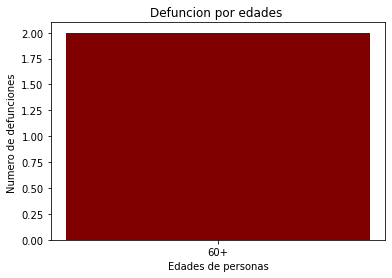

Franja edad 1 - numero muertos 2


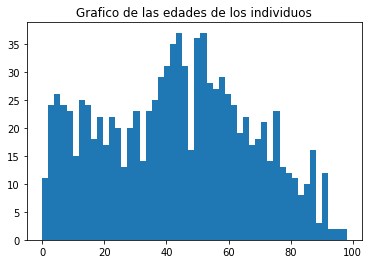

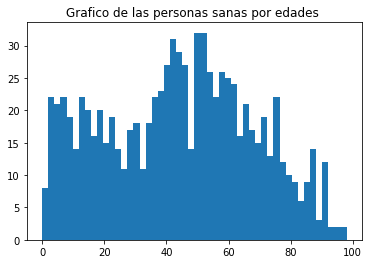

<Figure size 432x288 with 0 Axes>

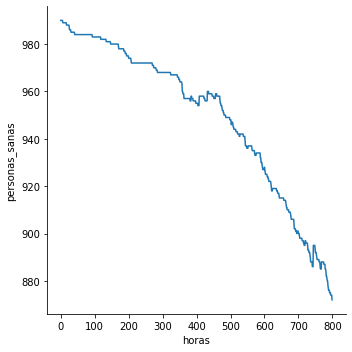

In [5]:
MiSimulador.mostrarTiempo()
MiSimulador.mostrarcementerio()
MiSimulador.defuncionesPorEdades()
MiSimulador.graficoPersonasEdades()
MiSimulador.graficoPersonasSanasActuales()
MiSimulador.graficoPersonasSanas()



In [6]:

MiSimulador.printearCatalogo()

ID: 0, Estado: sano, DNI: 17056488X, edad:62, Vivienda y piso:0,0, Oficina y piso:3,3Lugar actual: 3 3 1 
ID: 1, Estado: sano, DNI: 51510288V, edad:88, Vivienda y piso:0,0, Oficina y piso:4,2Lugar actual: 0 0 0 
ID: 2, Estado: sano, DNI: 13200083S, edad:51, Vivienda y piso:0,0, Oficina y piso:20,8Lugar actual: 0 0 0 
ID: 3, Estado: sano, DNI: 51676257H, edad:42, Vivienda y piso:0,0, Oficina y piso:14,4Lugar actual: 14 4 1 
ID: 4, Estado: inmune, DNI: 22741061H, edad:1, Vivienda y piso:0,0, Oficina y piso:16,1Lugar actual: 16 1 1 
ID: 5, Estado: sano, DNI: 80062865A, edad:63, Vivienda y piso:0,0, Oficina y piso:11,3Lugar actual: 0 0 0 
ID: 6, Estado: sano, DNI: 60681674S, edad:76, Vivienda y piso:0,0, Oficina y piso:14,2Lugar actual: 0 0 0 
ID: 7, Estado: sano, DNI: 65075874L, edad:15, Vivienda y piso:0,0, Oficina y piso:19,1Lugar actual: 19 1 1 
ID: 8, Estado: sano, DNI: 6216585F, edad:14, Vivienda y piso:0,1, Oficina y piso:17,1Lugar actual: 17 1 1 
ID: 9, Estado: sano, DNI: 76434083T

In [7]:
for i in MiSimulador.ciudadOficinas:
    print("-----------")
    print("")
    i.printearpersonas()
    print("")
    print("-----------")

-----------

ID :0
Piso 0 :
ID: 58, Estado: incubandoContagioso, DNI: 65182621T, edad:24, Vivienda y piso:1,2, Oficina y piso:0,0Lugar actual: 0 0 1 
ID: 252, Estado: incubando, DNI: 26436361T, edad:2, Vivienda y piso:5,0, Oficina y piso:0,0Lugar actual: 0 0 1 
ID: 480, Estado: sano, DNI: 86072848V, edad:67, Vivienda y piso:10,3, Oficina y piso:0,0Lugar actual: 0 0 1 
ID: 840, Estado: sano, DNI: 26570053Q, edad:24, Vivienda y piso:17,5, Oficina y piso:0,0Lugar actual: 0 0 1 
ID: 841, Estado: sano, DNI: 83282348S, edad:3, Vivienda y piso:17,5, Oficina y piso:0,0Lugar actual: 0 0 1 
ID: 997, Estado: sano, DNI: 47445756E, edad:41, Vivienda y piso:20,6, Oficina y piso:0,0Lugar actual: 0 0 1 
Piso 1 :
ID: 34, Estado: sano, DNI: 67707711N, edad:51, Vivienda y piso:1,0, Oficina y piso:0,1Lugar actual: 0 1 1 
ID: 76, Estado: sano, DNI: 74053512K, edad:6, Vivienda y piso:1,5, Oficina y piso:0,1Lugar actual: 0 1 1 
ID: 100, Estado: sano, DNI: 37511280M, edad:7, Vivienda y piso:2,1, Oficina y pis

In [9]:
MiSimulador.menuGraficas()

Bye Bye
